## Link do dataset: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [2]:
pinguins = pd.read_csv('/content/drive/MyDrive/penguins.csv')
pinguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
pinguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
pinguins.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [5]:
pinguins = pinguins.dropna()

In [6]:
pinguins['sex'] = pinguins['sex'].map({'MALE': 0, 'FEMALE': 1})

<ipython-input-6-c51779e71b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pinguins['sex'] = pinguins['sex'].map({'MALE': 0, 'FEMALE': 1})


In [7]:
pinguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
4,36.7,19.3,193.0,3450.0,1.0
5,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1.0
340,46.8,14.3,215.0,4850.0,1.0
341,50.4,15.7,222.0,5750.0,0.0
342,45.2,14.8,212.0,5200.0,1.0


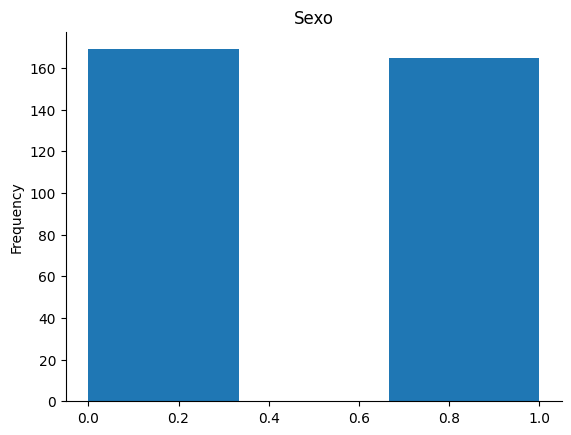

In [8]:
from matplotlib import pyplot as plt
pinguins['sex'].plot(kind='hist', bins=3, title='Sexo')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
pinguins.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  1
dtype: int64

In [10]:
pinguins = pinguins.dropna()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(pinguins)

StandardScaler()

In [12]:
scaled_data = scaler.transform(pinguins)

## PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

In [15]:
x_data = pca.transform(scaled_data)

In [16]:
x_data.shape

(334, 2)

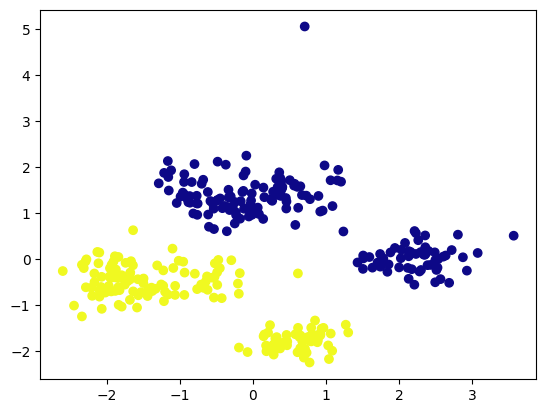

In [17]:
plt.scatter(x_data[:,0],x_data[:,1],c=pinguins['sex'],cmap='plasma')

<Axes: >

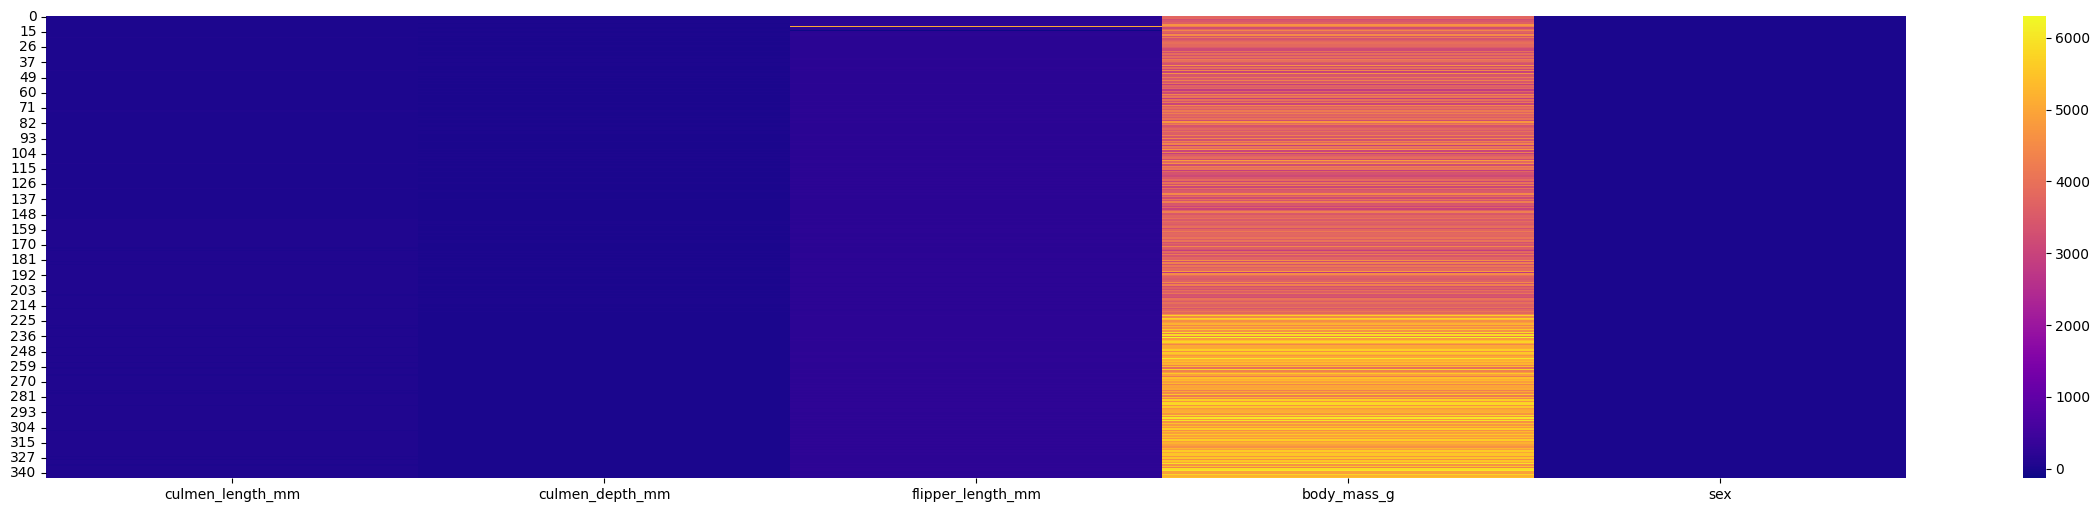

In [18]:
plt.figure(figsize=(30,6))
sns.heatmap(pinguins,cmap="plasma")

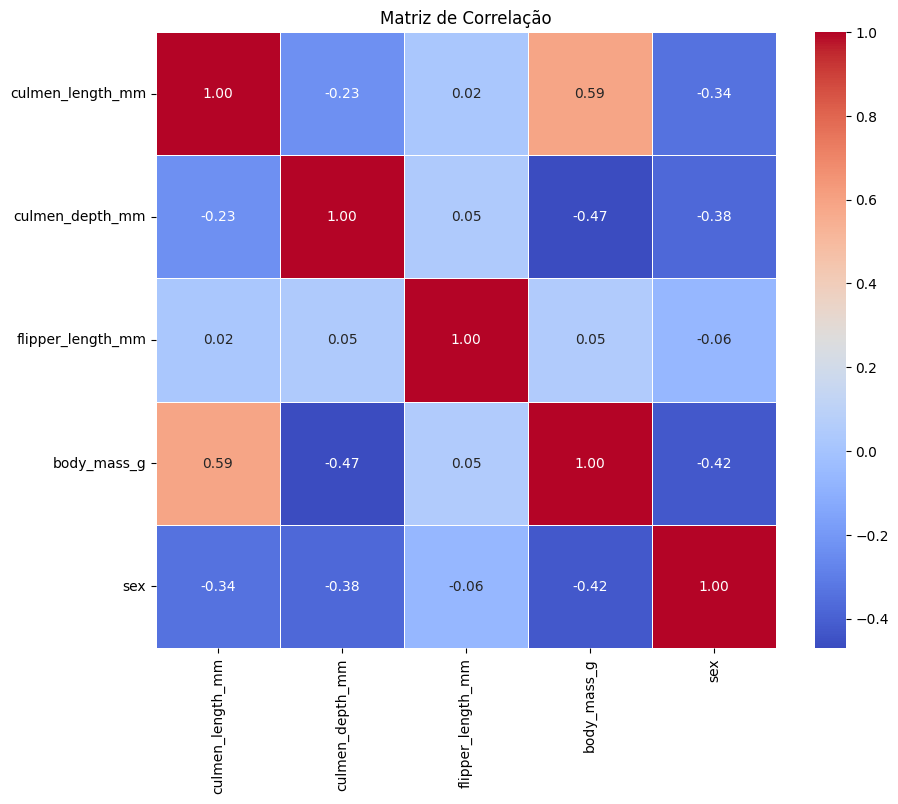

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(pinguins.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()